<a href="https://colab.research.google.com/github/mamun216/portfolio-projects/blob/master/Abalon_data_EDA_%26_ML_model_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# What is Abalon?

Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae. Other common names are ear shells, sea ears, and muttonfish or muttonshells in Australia, ormer in the UK, perlemoen in South Africa, and paua in New Zealand.

# Objective
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

The main objective is to determine the age of Abalone from the physical measurements.



# About the Data
The data set has 9 columns which have information related to physical measurements of abalones and the number of rings (representing age).

# Loading dataset and libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [144]:
abalone_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv", sep = "," )
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


# Data Description
Sex: Sex (M: Male, F: Female, I: Infant)

Length: Longest Shell measurement (millimetres - mm)

Diameter: Diameter - perpendicular to length (mm)

Height: Height - with meat in shell (mm)

Whole weight: Weight of whole abalone (grams)

Shucked weight: Weight of meat (grams)

Viscera weight: Gut weight after bleeding (grams)

Shell weight: Shell weight - after being dried (grams)

Rings: Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)

In [145]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3132 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3132 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3132 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 220.3+ KB


In [146]:
abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [147]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3132.000000,3132.000000,3132.00000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.523707,0.407952,0.139277,0.82867,0.359229,0.180731,0.239159,9.947957
std,0.119891,0.099336,0.038991,0.49063,0.221946,0.109924,0.139040,3.230252
min,0.110000,0.090000,0.000000,0.00800,0.002500,0.000500,0.003000,2.000000
25%,0.450000,0.350000,0.115000,0.44150,0.185375,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.79950,0.335500,0.170000,0.235000,10.000000
75%,0.615000,0.480000,0.165000,1.15300,0.499500,0.252500,0.330000,11.000000
max,0.815000,0.650000,0.515000,2.82550,1.488000,0.760000,1.005000,29.000000


The analysis shows that the Ring attribute values ranges from 2 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution, so that, the 2nd and 3rd quartiles are defined in a range of less than 1 std deviation. We observe that its possible to approximate the distribution of this attribute to a normal curve.

In [148]:
abalone_data.shape

(3132, 9)

# Univariate analysis
It means analysis of individual attributes with different visualization method. Lets see how target variable Rings look.

## Target attribute

In [149]:
abalone_data.Rings.describe()

count    3132.000000
mean        9.947957
std         3.230252
min         2.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

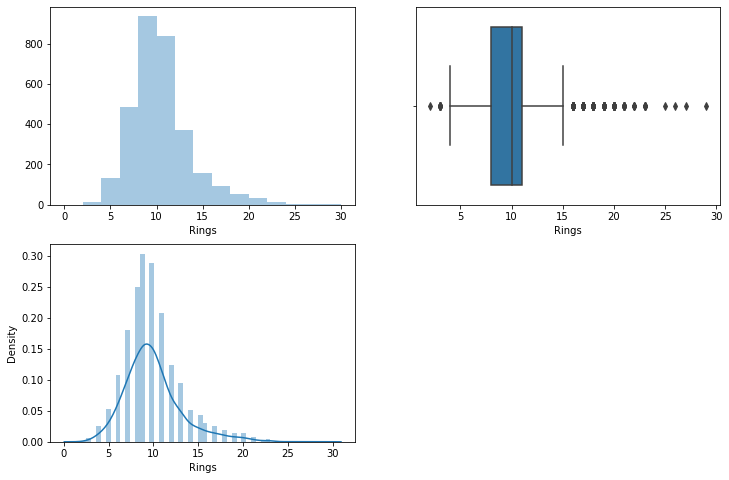

In [150]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

WE can see there is outlier in Rings column, we will remove and see how it show later on.

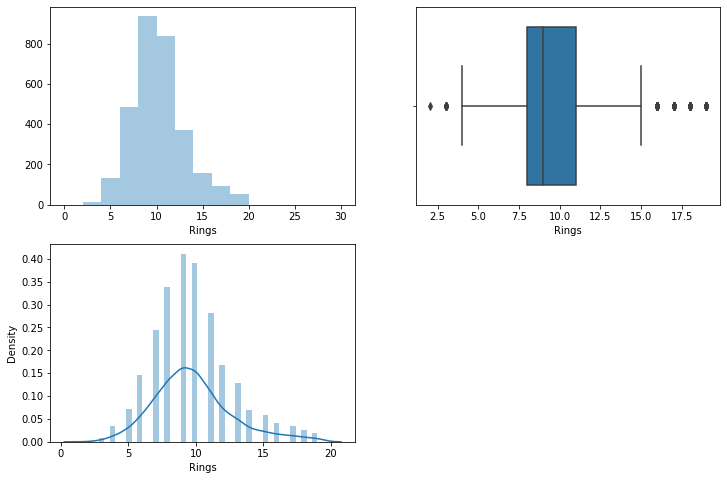

In [151]:
abalone_data = abalone_data[abalone_data['Rings'] < 20]
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(abalone_data['Rings'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(abalone_data['Rings']);
plt.subplot(2,2,3)
sns.distplot(abalone_data['Rings']);

Yes, it looks better normal distribution, mean changes from 10 to 9. 

## Size attributes
Size attributes includes dimension of abalone which comprises about abalone height, diameter and length. We will observe these attributes by showing them with histogram and boxplot.

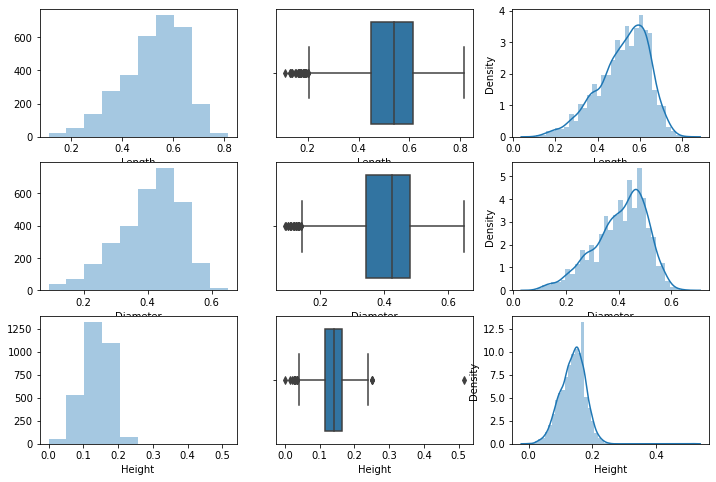

In [152]:
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins = 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins= 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

Once more, we observe an approximate normal distribution. However we notice the high peak formed by the Height histogram. Analyzing the Height boxplot we conclude that the high peak is formed due the presence of two observations that lie far beyond the central positions of the distribution.Thats outlier.

Thus, we filter these outliers in order to obtain a more realistic visualization of the distribution of the Height attribute:

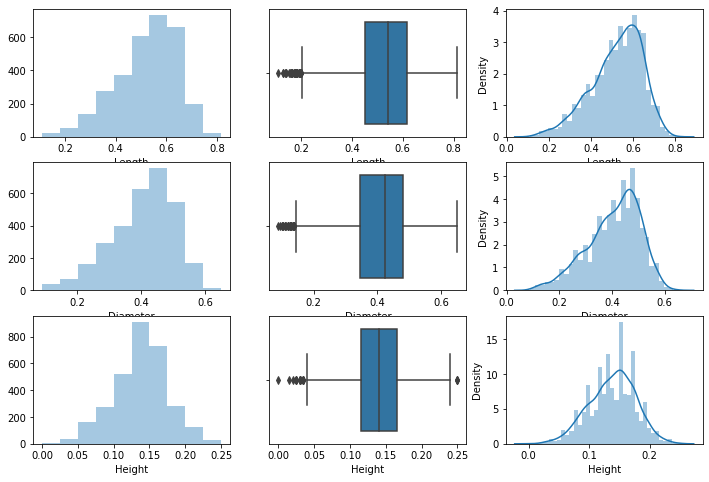

In [153]:
abalone_data = abalone_data[abalone_data['Height'] < 0.4]
plt.figure(figsize=(12,8))
plt.subplot(3,3,1)
sns.distplot(abalone_data['Length'], kde=False, bins= 10);
plt.subplot(3,3,2)
sns.boxplot(abalone_data['Length']);
plt.subplot(3,3,3)
sns.distplot(abalone_data['Length']);

plt.subplot(3,3,4)
sns.distplot(abalone_data['Diameter'], kde=False, bins= 10);
plt.subplot(3,3,5)
sns.boxplot(abalone_data['Diameter']);
plt.subplot(3,3,6)
sns.distplot(abalone_data['Diameter']);

plt.subplot(3,3,7)
sns.distplot(abalone_data['Height'], kde=False, bins = 10);
plt.subplot(3,3,8)
sns.boxplot(abalone_data['Height']);
plt.subplot(3,3,9)
sns.distplot(abalone_data['Height']);

## Weight attributes
The weight attributes includes rest of the wiights attributes and were analyzed following a similar approach to the Size attributes analysis. A similar distributions were observed, however, for the weight attributes the bell curve is a little larger.

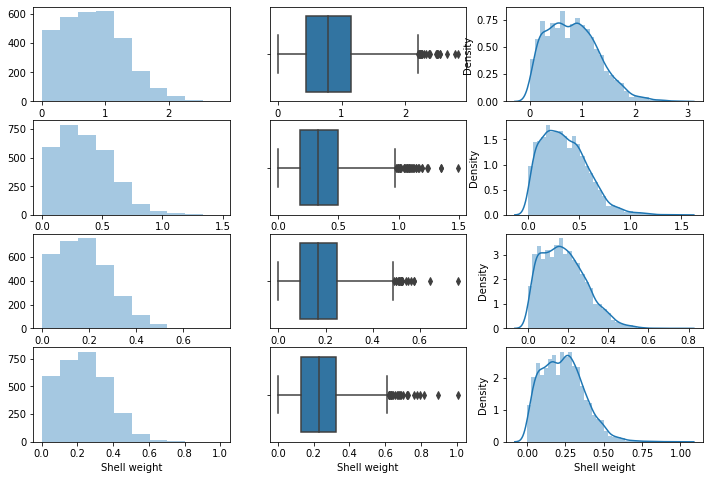

In [154]:
plt.figure(figsize=(12,8))
plt.subplot(4,3,1)
sns.distplot(abalone_data['Whole weight'], kde=False, bins= 10);
plt.subplot(4,3,2)
sns.boxplot(abalone_data['Whole weight']);
plt.subplot(4,3,3)
sns.distplot(abalone_data['Whole weight']);

plt.subplot(4,3,4)
sns.distplot(abalone_data['Shucked weight'], kde=False, bins= 10);
plt.subplot(4,3,5)
sns.boxplot(abalone_data['Shucked weight']);
plt.subplot(4,3,6)
sns.distplot(abalone_data['Shucked weight']);

plt.subplot(4,3,7)
sns.distplot(abalone_data['Viscera weight'], kde=False, bins= 10);
plt.subplot(4,3,8)
sns.boxplot(abalone_data['Viscera weight']);
plt.subplot(4,3,9)
sns.distplot(abalone_data['Viscera weight']);

plt.subplot(4,3,10)
sns.distplot(abalone_data['Shell weight'], kde=False, bins= 10);
plt.subplot(4,3,11)
sns.boxplot(abalone_data['Shell weight']);
plt.subplot(4,3,12)
sns.distplot(abalone_data['Shell weight']);


## SEX attribute- categorical variable
The Sex attribute is a categorical variable for which the possibles values are: M for Male, F for Female and I of Infant (an abalone which is not adult). We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

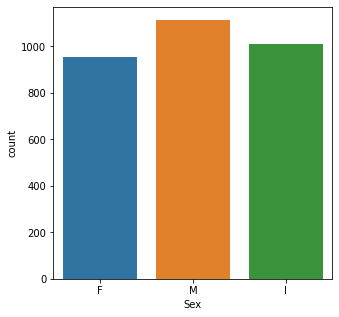

In [155]:
plt.figure(figsize=(5,5))
sns.countplot(abalone_data.Sex);

# Multivariate Analysis
In this section we analyzed how the dataset attributes are related and how the independent variables influences the target variable. Our first step in the multivariate analysis was to visualize the correlation matrix in a heatmap:

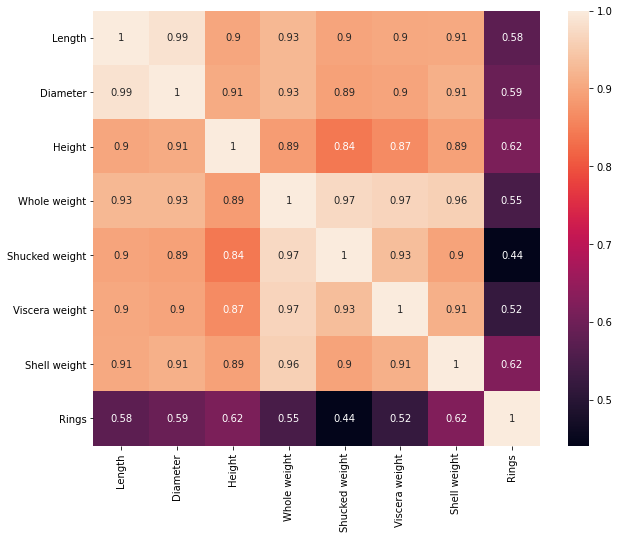

In [156]:
plt.figure(figsize = (10,8))
sns.heatmap(abalone_data.corr(), annot = True); # annot = true : to display the correlation value in the graph.

Analyzing the correlation matrix, we notice that Height and Shell weight are the attributes that most correlates to Rings. Therefore, we concentrated the multivariate analysis on the correlation of these two attributes with Rings:

<Figure size 720x360 with 0 Axes>

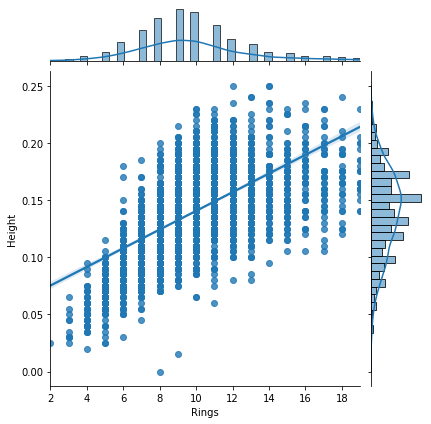

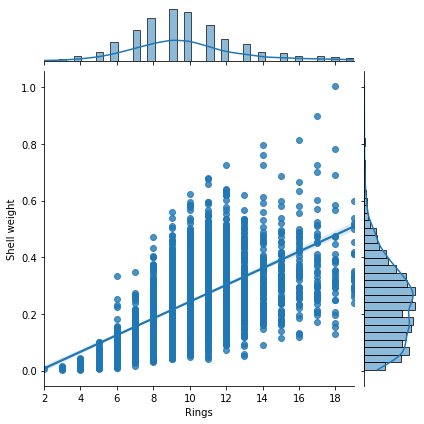

In [157]:
plt.figure(figsize=(10, 5))
sns.jointplot(data=abalone_data, x='Rings', y='Height', kind='reg');
sns.jointplot(data=abalone_data, x='Rings', y='Shell weight', kind='reg');

# How correlation varies with the number of rings ?

Based on the previous analysis, we decided to investigate the variation of the correlation regarding the number of rings in more detail. We tested for many values, and found that the region delimited by Rings < 10 has greater correlation between the independent attributes and the target variable.

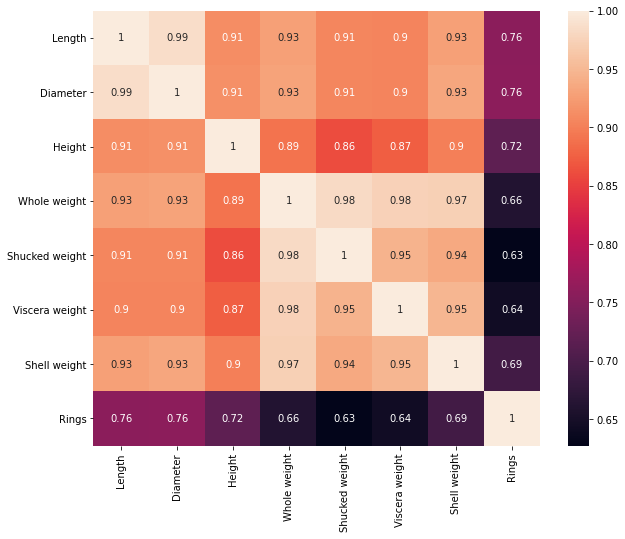

In [158]:
i_abalone = abalone_data[abalone_data['Rings'] < 10]

plt.figure(figsize=(10, 8))
corr = i_abalone.corr()
sns.heatmap(corr, annot=True);

# Lets see the correlation between size attributes and Rings.

<Figure size 1440x360 with 0 Axes>

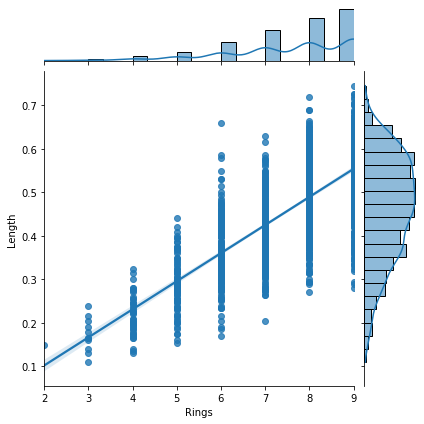

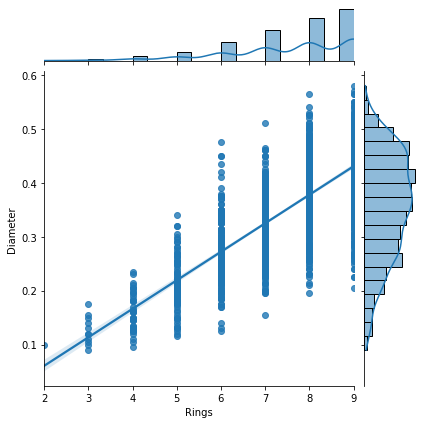

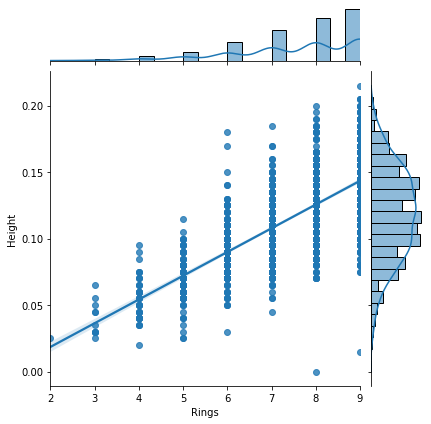

In [159]:
plt.figure(figsize=(20, 5))

sns.jointplot(data=i_abalone, x='Rings', y='Length',  kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Diameter', kind='reg')
sns.jointplot(data=i_abalone, x='Rings', y='Height', kind='reg')

# The violin plots bellow show that the median of Size attributes increases as instances are grouped by Rings:

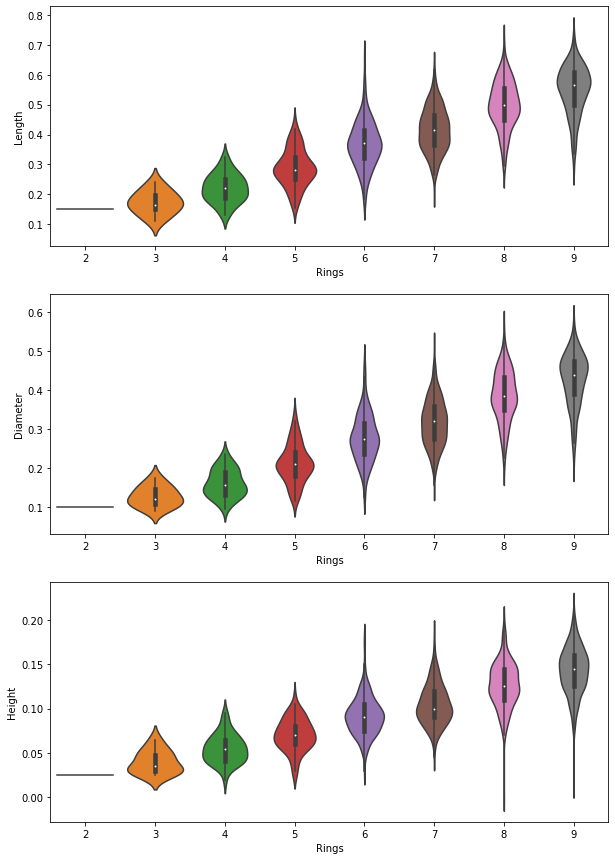

In [160]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
sns.violinplot(data=i_abalone, x='Rings', y='Length')
plt.subplot(3,1,2)
sns.violinplot(data=i_abalone, x='Rings', y='Diameter')
plt.subplot(3,1,3)
sns.violinplot(data=i_abalone, x='Rings', y='Height');

# We observe a similar result where comparing Height and Shell weight to Rings:

<Figure size 1440x360 with 0 Axes>

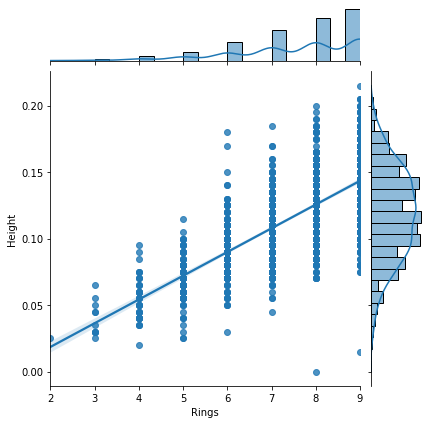

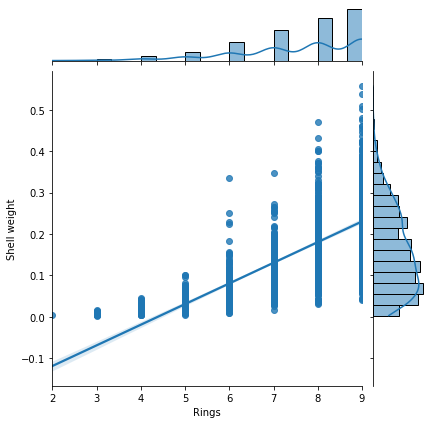

In [161]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=i_abalone, x='Rings', y='Height',  kind='reg');
sns.jointplot(data=i_abalone, x='Rings', y='Shell weight', kind='reg');

### On the other hand, when we consider only samples with more than 10 Rings we observe that correlation decays drastically to near 0 (zero)

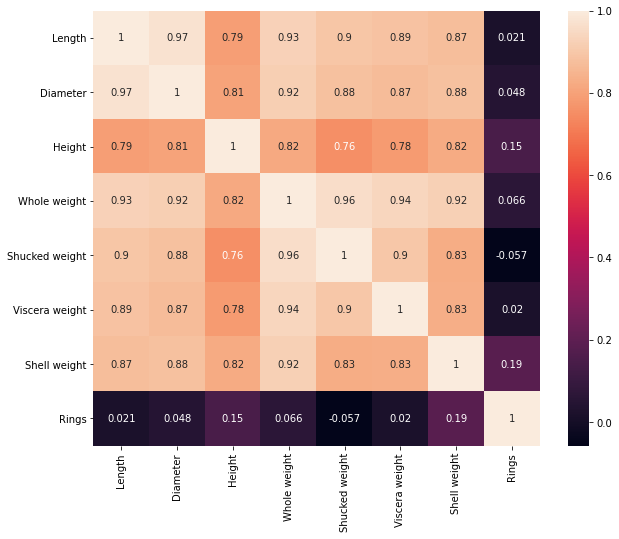

In [162]:
 # How correlation shows when Rings more than 10
 a_abalone = abalone_data[abalone_data['Rings'] >= 10]

plt.figure(figsize=(10, 8))
corr = a_abalone.corr()
sns.heatmap(corr, annot=True);

<Figure size 1440x720 with 0 Axes>

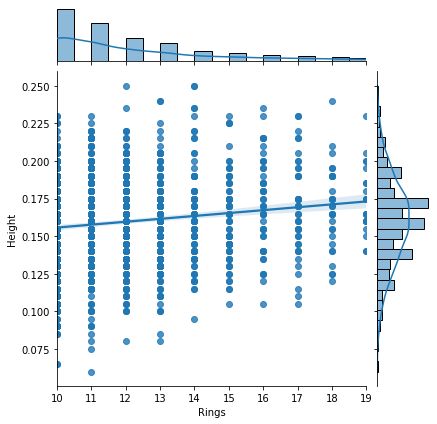

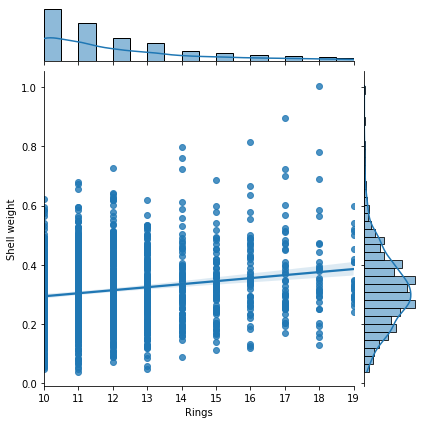

In [163]:
plt.figure(figsize=(20, 10))

sns.jointplot(data=a_abalone, y='Height', x='Rings', kind='reg');
sns.jointplot(data=a_abalone, y='Shell weight', x='Rings', kind='reg');

These results suggest that abalones grows in size and weight until a certain age, near 10 years. After this age their size and age remains stable in function of age, depending more on environmental factors.

# Influence of Sex on attributes
Finally, we analyze how the Sex category influences the distribution of variables Rings, Height and Shell weight. Our objective is learn if the different categories of abalones have different distribution parameters or even form. To accomplish this objective, we visualize the distribution of each one of these parameters in relation to Sex. Finally, we analyze how the different Sex categories of abalones influence the correlation of Rings, Height and Shell weight.

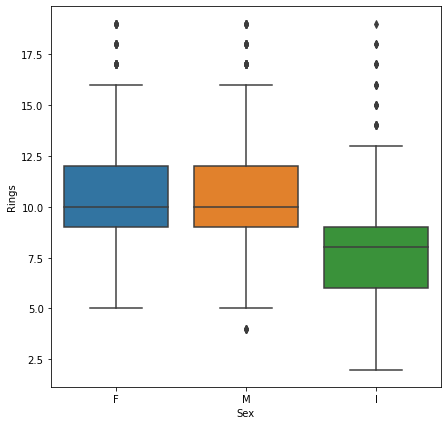

In [164]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Rings');

However, the form of the distribution remains similar: samples are concentrated around the mean of the distribution. The difference is that for Infant abalones the mean of Rings is lower.

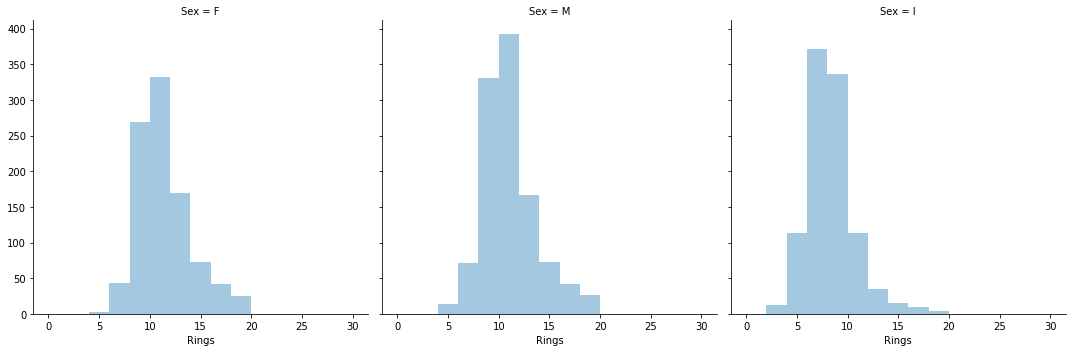

In [165]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Rings', kde=False, bins=range(0, 31, 2));


# For height 

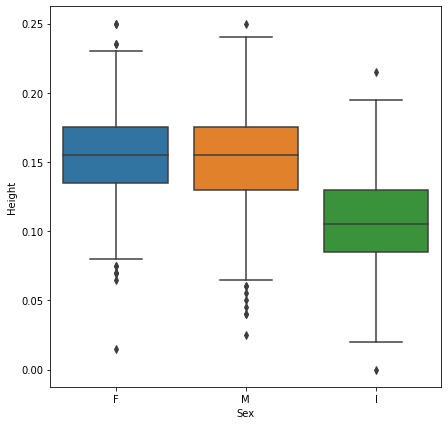

In [166]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Height');

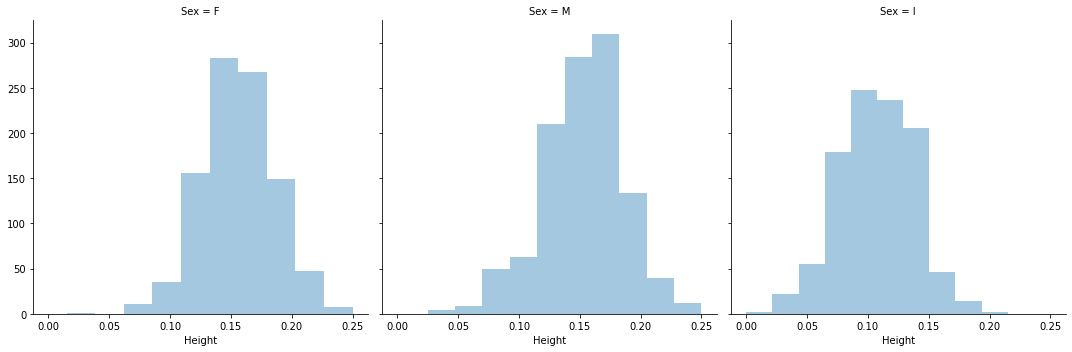

In [167]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Height', kde=False, bins= 10);

# For shell weight

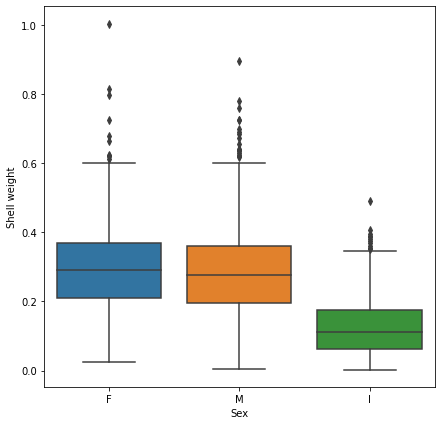

In [168]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=abalone_data, x='Sex', y='Shell weight');

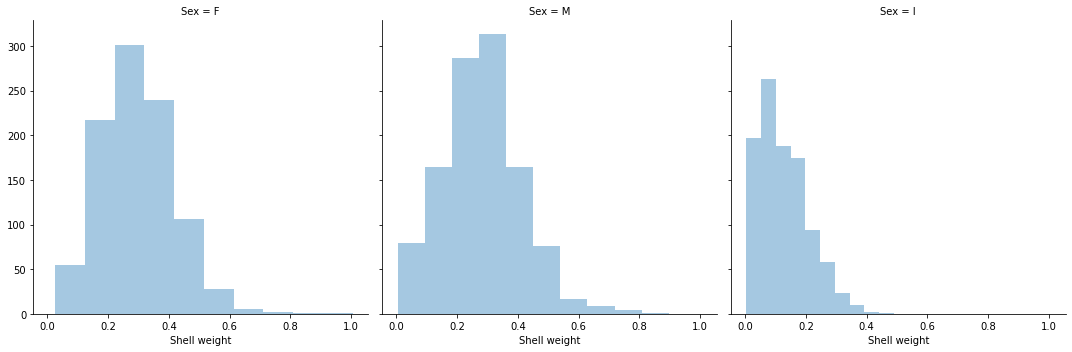

In [169]:
g = sns.FacetGrid(abalone_data, col='Sex', margin_titles=True, size=5)
g.map(sns.distplot, 'Shell weight', kde=False, bins= 10);

Finally, we analyze how the sex categories influence the correlations Rings & Height and Rings & Shell weight. We already concluded that these attributes has stronger correlation for lower values of Rings. Because Infant abalones have lower values of Rings, the consequence is that Height and Shell weight have stronger correlation to rings. Observing the regression curve for the Infant category, we notice that its inclination is closer to 45°.

we conclude that it is possible to build a model to predict the target value in function of the independent attributes.

<Figure size 1440x360 with 0 Axes>

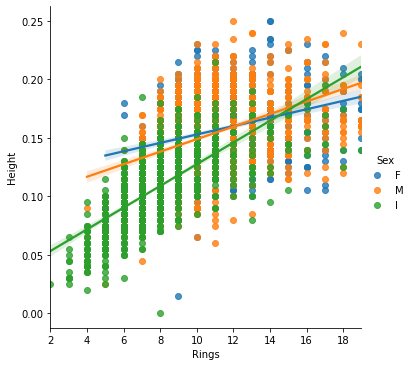

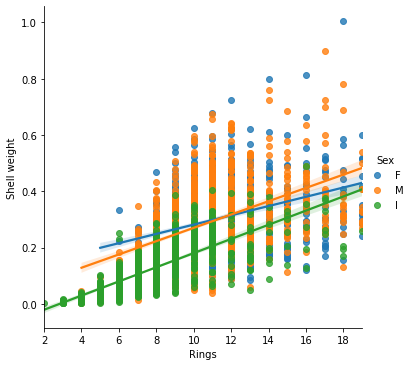

In [170]:
plt.figure(figsize=(20, 5))

sns.lmplot(data=abalone_data, x='Rings', y='Height', hue='Sex', fit_reg=True);
sns.lmplot(data=abalone_data, x='Rings', y='Shell weight', hue='Sex', fit_reg=True);

In [171]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


# Convert categorical data to numerical data for machine learning model

In [174]:
# performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abalone_data['Sex']= le.fit_transform(abalone_data['Sex'])
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,0,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,2,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,0,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,2,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


# Outlier detection and removal

## Z score method

In [175]:
from scipy import stats
abalone_data_outlier= abalone_data.copy()
z = np.abs(stats.zscore(abalone_data_outlier))
print(z)

[[1.28489676 0.02335487 0.06670246 ... 0.37795503 0.20408728 0.08348926]
 [1.28489676 0.64346315 0.82200969 ... 0.61086119 0.70261236 0.26260351]
 [1.15950226 1.56537153 1.34320437 ... 0.74547466 3.98938843 2.85223149]
 ...
 [1.15950226 0.35676387 0.48718951 ... 0.03305583 0.17713779 0.42958204]
 [1.15950226 0.73184901 0.7893124  ... 0.42123275 0.37141595 0.26260351]
 [1.28489676 1.10693414 0.99072766 ... 0.86877791 1.38679424 0.77567482]]


Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [176]:
threshold = 3
print(np.where(z > 3))

(array([   2,    3,   20,   53,   80,   84,  173,  173,  209,  266,  267,
        267,  285,  285,  309,  323,  361,  392,  431,  449,  460,  490,
        490,  491,  510,  510,  662,  677,  692,  708,  720,  763,  786,
        786,  869,  869,  869,  888,  888,  888,  888,  899,  899,  928,
        936,  936,  936,  977,  977,  977, 1017, 1017, 1051, 1081, 1089,
       1125, 1126, 1126, 1126, 1135, 1211, 1231, 1287, 1291, 1294, 1299,
       1315, 1350, 1361, 1414, 1435, 1455, 1499, 1528, 1528, 1558, 1585,
       1614, 1681, 1681, 1681, 1684, 1705, 1741, 1814, 1862, 1862, 1862,
       1969, 1972, 1984, 1984, 2008, 2008, 2026, 2057, 2063, 2366, 2366,
       2366, 2366, 2414, 2474, 2474, 2709, 2709, 2709, 2757, 2873, 2874,
       2893, 2982, 2982, 3010, 3036, 3044, 3049]), array([7, 8, 4, 8, 5, 7, 4, 5, 8, 8, 4, 6, 1, 2, 8, 6, 1, 5, 5, 3, 8, 5,
       6, 8, 5, 6, 6, 6, 8, 5, 8, 3, 1, 2, 4, 5, 6, 4, 5, 6, 7, 5, 6, 5,
       4, 5, 6, 4, 5, 6, 1, 2, 5, 6, 5, 7, 4, 5, 7, 8, 5, 7, 8, 8, 6, 8,

The above data shows outlier where z score more than 3. 
The first array contains the list of row numbers and second array respective column numbers, which mean z[234][8] have a Z-score higher than 3.

In [177]:
print(z[234][8])

0.26260351392438197


## now we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z-score.

In [178]:
abalone_data_outlier= abalone_data_outlier[(z < 3).all(axis=1)]
abalone_data.shape

(3080, 9)

In [179]:
abalone_data_outlier.shape

(2996, 9)

So, above code removed around 84 rows from the dataset i.e. outliers have been removed.

# Separating Input Features and Output Features

In [180]:
X = abalone_data_outlier.drop('Rings', axis = 1) # Input/independent variable
y = abalone_data_outlier. Rings # Target / dependent variable

# Splitting the data into Train and Validation Set

In [181]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_val: independent/input feature data for testing the model; will be used to predict the output values
# y_val: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# Building a model

In [182]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()


## Train the model

In [183]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Predict on the validation data (X_val)
Now we predict using our trained model on the validation set we created i.e. X_val and evaluate our model on unforeseen data.

In [184]:
pred = rfr.predict(X_val)

# Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Mean Squared Error (in short MSE), Mean Absolute Error (in short MAE), Root Mean Squared Erro (in short RMSE), etc. However, RMSE is the metric for this data sprint.

In [185]:
# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred)))

Root Mean Squared Error is:  1.783455638801498


# Predict The Output For Testing Dataset
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data.

In [186]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


# converting categorical data to numerical

In [187]:
# performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_data['Sex']= le.fit_transform(test_data['Sex'])
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,1,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,1,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,0,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,0,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [188]:
test_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

# Outlier detection and removal

In [189]:
test_data_outlier= test_data.copy()
z = np.abs(stats.zscore(test_data_outlier))
print(z)

[[1.28470089 0.24920464 0.37670286 ... 0.86043731 0.58637213 0.29034875]
 [0.07311306 1.3659842  1.39117826 ... 1.18386283 1.28565876 1.23767124]
 [0.07311306 1.07607851 0.88606937 ... 0.94971391 1.16606957 1.05874618]
 ...
 [0.07311306 0.37202183 0.53249315 ... 0.715565   0.83949907 0.70089607]
 [1.13847477 1.16033681 1.13436619 ... 1.10809481 1.28550897 1.12413952]
 [0.07311306 0.04212915 0.07363752 ... 0.48366752 0.52212774 0.35020295]]


In [192]:
threshold = 3
print(np.where(z>threshold))

(array([  26,   45,   52,   62,   62,   87,  110,  248,  362,  386,  401,
        401,  415,  468,  474,  474,  569,  600,  600,  600,  649,  686,
        686,  686,  705,  716,  716,  833,  839,  859,  930,  940,  975,
        992,  992, 1030]), array([6, 3, 5, 1, 2, 5, 1, 7, 7, 5, 1, 2, 7, 7, 4, 5, 5, 4, 5, 6, 6, 4,
       5, 6, 7, 1, 2, 5, 5, 7, 7, 2, 5, 1, 2, 7]))


In [193]:
print(z[26][6])

3.180537779798613


In [194]:
test_data_outlier= test_data_outlier[(z < 3).all(axis=1)]
test_data.shape

(1044, 8)

In [195]:
test_data_outlier.shape

(1017, 8)

# Make prediction on test dataset

In [197]:
target = rfr.predict(test_data)
target[:5]

array([10.02,  6.47,  7.02, 11.08,  8.84])

# Save prediction results via colab notebook

In [198]:
# To create Dataframe of predicted value with particular respective index
result = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
result.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
result.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
#result.to_csv('submission.csv')         
#files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>